# Stage One Task: Python Deep Dive

## 1. Translating DNA to protein

Generate a dictionary containing codon to amino acid mappings.
Translate a given DNA sequence into its corresponding amino acid sequence.

In [68]:
dic = {'AUA':'I', 'AUC':'I', 'AUU':'I', 'AUG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACU':'T',
'AAC':'N', 'AAU':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGU':'S', 'AGA':'R', 'AGG':'R',
'CUA':'L', 'CUC':'L', 'CUG':'L', 'CUU':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCU':'P',
'CAC':'H', 'CAU':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGU':'R',
'GUA':'V', 'GUC':'V', 'GUG':'V', 'GUU':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCU':'A',
'GAC':'D', 'GAU':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGU':'G',
'UCA':'S', 'UCC':'S', 'UCG':'S', 'UCU':'S',
'UUC':'F', 'UUU':'F', 'UUA':'L', 'UUG':'L',
'UAC':'Y', 'UAU':'Y', 'UAA':'STOP', 'UAG':'STOP',
'UGC':'C', 'UGU':'C', 'UGA':'STOP', 'UGG':'W'}

In [69]:
def translate_dna_protein(codon_table, dna_seq):
    protein = ''

    # Convert DNA to RNA
    rna_seq = dna_seq.replace('T', 'U')

    for i in range(0, len(rna_seq), 3):
        codon = rna_seq[i:i+3]

        if len(codon) < 3:
            break

        aa = codon_table.get(codon)

        # Stop codon → stop translation
        if aa == 'STOP':
            break

        # Skip unknown codons
        if aa:
            protein += aa

    return protein

    

In [70]:
translate_dna_protein(dic, 'ATGGCCATGTAA')

'MAM'

In [71]:
translate_dna_protein(dic, 'ATGGCCTTTGACGATGTTGACCTGACCGGCTACTTCTTGAAGGCGTTCGTACTGGGCCATGAACCGTGGCGTATTTGAGGCTTAA'
)

'MAFDDVDLTGYFLKAFVLGHEPWRI'

### b. Calculate hamming distance

Calculate the Hamming distance between your username in HacBio and another username from social media  of equal length.


In [72]:
def measure_hamming_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length")

    distance = 0
    for a, b in zip(seq1, seq2):
        if a != b:
            distance += 1

    return distance

In [73]:
first='anyavala'
second='ozlemkal'
measure_hamming_distance(first, second)

8

## Part A – Gene Expression Analysis

### 1.HEATMAP

a. Heatmap

Use the normalized gene expression dataset to plot a clustered heatmap of the top differentially expressed genes between HBR and UHR samples.
Label both genes and samples.
Use a color gradient (e.g., Blues) to indicate expression levels.

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
import numpy as np

In [85]:
df=pd.read_csv('normalized_counts_for_HBR_and_UHR.csv', index_col=0)

In [86]:
df

,HBR_1,HBR_2,HBR_3,UHR_1,UHR_2,UHR_3
SULT4A1,375.0,343.6,339.4,3.5,6.9,2.6
MPPED1,157.8,158.4,162.6,0.7,3.0,2.6
PRAME,0.0,0.0,0.0,568.9,467.3,519.2
IGLC2,0.0,0.0,0.0,488.6,498.0,457.5
IGLC3,0.0,0.0,0.0,809.7,313.8,688.0
CDC45,2.6,1.0,0.0,155.0,152.5,149.9
CLDN5,77.6,88.5,67.2,1.4,2.0,0.0
PCAT14,0.0,0.0,1.2,139.8,154.4,155.1
RP5-1119A7.17,53.0,57.6,51.9,0.0,0.0,0.0
MYO18B,0.0,0.0,0.0,59.5,84.2,56.5


In [94]:
# Sample groups
groups = {
    "HBR": ["HBR_1", "HBR_2", "HBR_3"],
    "UHR": ["UHR_1", "UHR_2", "UHR_3"]
}

# Compute mean expression per group
df["HBR_mean"] = df[groups["HBR"]].mean(axis=1)
df["UHR_mean"] = df[groups["UHR"]].mean(axis=1)

# Compute fold change (absolute difference or log2)
df["diff"] = np.abs(df["HBR_mean"] - df["UHR_mean"])

# Select top N genes (e.g., top 20)
top_genes = df.nlargest(20, "diff")
heatmap_data = top_genes[groups["HBR"] + groups["UHR"]]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a color palette, e.g., Blues
sns.set(font_scale=1)
cg = sns.clustermap(
    heatmap_data,
    cmap="Blues",
    standard_scale=1,   # normalize rows to 0-1
    row_cluster=True,   # cluster genes
    col_cluster=True,   # cluster samples
    linewidths=0.5,
    figsize=(10, 10)
)

# Add labels
cg.ax_heatmap.set_xlabel("Samples")
cg.ax_heatmap.set_ylabel("Genes")
plt.show()

### 1.Volcano Plot

Create a volcano plot to visualize DEGs between HBR and UHR samples.
    Highlight significantly upregulated and downregulated genes.

In [97]:
df1=pd.read_csv('differential_expression_results.csv')
df1

,name,log2FoldChange,PAdj,-log10PAdj,significance
0,SYNGR1,-4.6,5.200000e-217,216.283997,down
1,SEPT3,-4.6,4.500000e-204,203.346787,down
2,YWHAH,-2.5,4.700000e-191,190.327902,down
3,RPL3,1.7,5.400000e-134,133.267606,ns
4,PI4KA,-2.0,2.900000e-118,117.537602,down
...,...,...,...,...,...
966,ABHD17AP4,0.0,1.000000e+00,-0.000000,ns
967,AC006946.17,0.0,1.000000e+00,-0.000000,ns
968,NDUFA9P1,0.0,1.000000e+00,-0.000000,ns
969,YES1P1,0.0,1.000000e+00,-0.000000,ns


In [100]:
print(df1.columns)


Index(['name', 'log2FoldChange', 'PAdj', '-log10PAdj', 'significance'], dtype='object')


In [101]:
import numpy as np

def significance(row):
    if row["PAdj"] < 0.05 and row["log2FoldChange"] > 1:
        return "Upregulated"
    elif row["PAdj"] < 0.05 and row["log2FoldChange"] < -1:
        return "Downregulated"
    else:
        return "Not significant"

df1["significance"] = df1.apply(significance, axis=1)


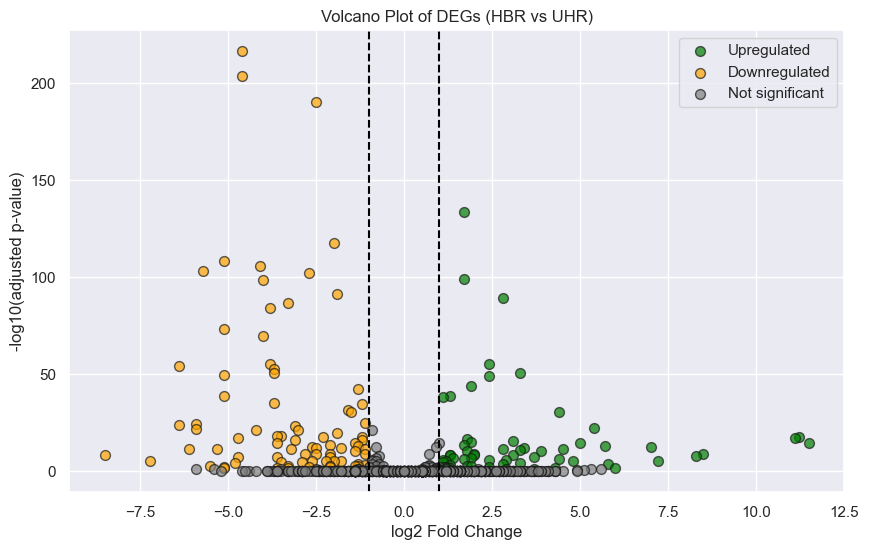

In [104]:
import matplotlib.pyplot as plt

# Prepare colors
colors = {
    "Upregulated": "green",
    "Downregulated": "orange",
    "Not significant": "grey"
}

# Scatter plot
plt.figure(figsize=(10,6))
for sig in ["Upregulated", "Downregulated", "Not significant"]:
    subset = df1[df1["significance"] == sig]
    plt.scatter(
        subset["log2FoldChange"], 
        -np.log10(subset["PAdj"]),
        c=colors[sig],
        label=sig,
        alpha=0.7,
        edgecolors="k",
        s=50
    )

# Add dashed vertical lines at log2FC = ±1
plt.axvline(x=1, color='black', linestyle='--')
plt.axvline(x=-1, color='black', linestyle='--')

# Labels and title
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(adjusted p-value)")
plt.title("Volcano Plot of DEGs (HBR vs UHR)")
plt.legend()
plt.show()


# Part B – Breast Cancer Data Exploration

### c. Scatter Plot (radius vs texture)

Plot texture_mean vs radius_mean and color points by diagnosis (M = malignant, B = benign).

In [ ]:
df2=pd.read_csv('breast_cancer_wisconsin.csv')
df.head()


,HBR_1,HBR_2,HBR_3,UHR_1,UHR_2,UHR_3,HBR_mean,UHR_mean,diff
SULT4A1,375.0,343.6,339.4,3.5,6.9,2.6,352.666667,4.333333,348.333333
MPPED1,157.8,158.4,162.6,0.7,3.0,2.6,159.600000,2.100000,157.500000
PRAME,0.0,0.0,0.0,568.9,467.3,519.2,0.000000,518.466667,518.466667
IGLC2,0.0,0.0,0.0,488.6,498.0,457.5,0.000000,481.366667,481.366667
IGLC3,0.0,0.0,0.0,809.7,313.8,688.0,0.000000,603.833333,603.833333


In [107]:
df.isnull().sum()

HBR_1       0
HBR_2       0
HBR_3       0
UHR_1       0
UHR_2       0
UHR_3       0
HBR_mean    0
UHR_mean    0
diff        0
dtype: int64

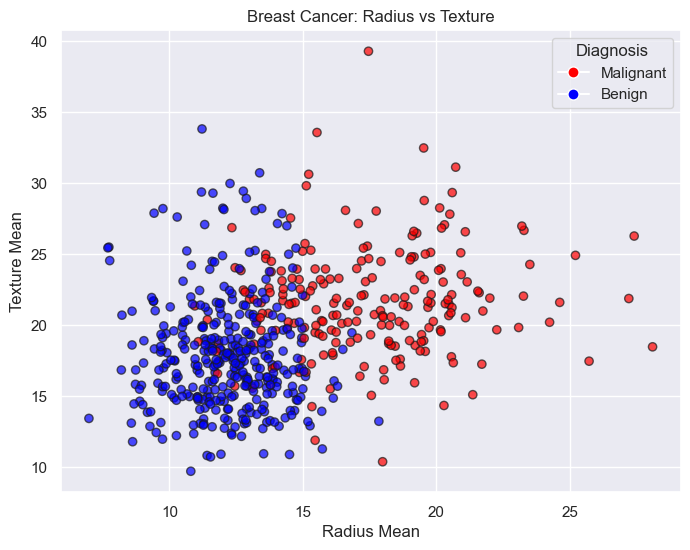

In [109]:
import matplotlib.pyplot as plt

# Map diagnosis to colors
colors = {'M': 'red', 'B': 'blue'}
point_colors = df2['diagnosis'].map(colors)

plt.figure(figsize=(8,6))
plt.scatter(
    df2['radius_mean'], 
    df2['texture_mean'], 
    c=point_colors, 
    alpha=0.7,   # slightly transparent for overlapping points
    edgecolor='k' # black edge for better visibility
)

# Add legend manually
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Malignant', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='blue', markersize=8)
]
plt.legend(handles=legend_elements, title="Diagnosis")

# Labels and title
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Breast Cancer: Radius vs Texture')

plt.show()



### d. Correlation Heatmap

Compute the correlation matrix of six key features:

radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean.

Plot as a heatmap with correlation values annotated.

In [110]:
# Select the six key features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 
            'area_mean', 'smoothness_mean', 'compactness_mean']

df_features = df2[features]

In [111]:
corr_matrix = df_features.corr()
print(corr_matrix)

                  radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean          1.000000      0.323782        0.997855   0.987357   
texture_mean         0.323782      1.000000        0.329533   0.321086   
perimeter_mean       0.997855      0.329533        1.000000   0.986507   
area_mean            0.987357      0.321086        0.986507   1.000000   
smoothness_mean      0.170581     -0.023389        0.207278   0.177028   
compactness_mean     0.506124      0.236702        0.556936   0.498502   

                  smoothness_mean  compactness_mean  
radius_mean              0.170581          0.506124  
texture_mean            -0.023389          0.236702  
perimeter_mean           0.207278          0.556936  
area_mean                0.177028          0.498502  
smoothness_mean          1.000000          0.659123  
compactness_mean         0.659123          1.000000  


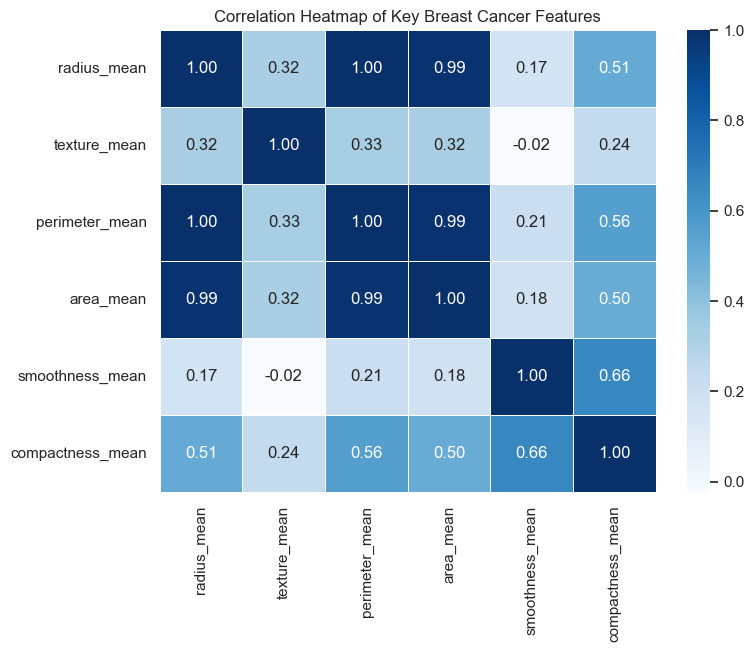

In [113]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, 
    annot=True,         # show correlation values
    cmap='Blues',    # color gradient: blue (-1) → red (+1)
    fmt=".2f",          # format numbers to 2 decimal places
    linewidths=0.5      # grid lines between cells
)

plt.title("Correlation Heatmap of Key Breast Cancer Features")
plt.show()

### e. Scatter Plot (smoothness vs compactness)

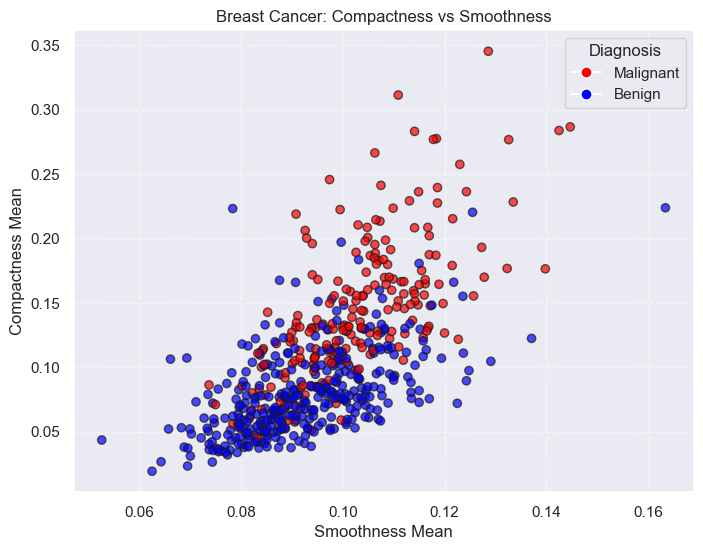

In [114]:
# Map diagnosis to colors
colors = {'M': 'red', 'B': 'blue'}
point_colors = df2['diagnosis'].map(colors)

plt.figure(figsize=(8,6))
plt.scatter(
    df2['smoothness_mean'],       # X-axis
    df2['compactness_mean'],      # Y-axis
    c=point_colors,
    alpha=0.7,
    edgecolor='k'                # black edge for better visibility
)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Axis labels and title
plt.xlabel('Smoothness Mean')
plt.ylabel('Compactness Mean')
plt.title('Breast Cancer: Compactness vs Smoothness')

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Malignant', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='blue', markersize=8)
]
plt.legend(handles=legend_elements, title="Diagnosis")

plt.show()

### f. Density Plot (area distribution)

Plot kernel density estimates (KDE) of area_mean for both M and B diagnoses on the same axis.
Add legend and labeled axes.

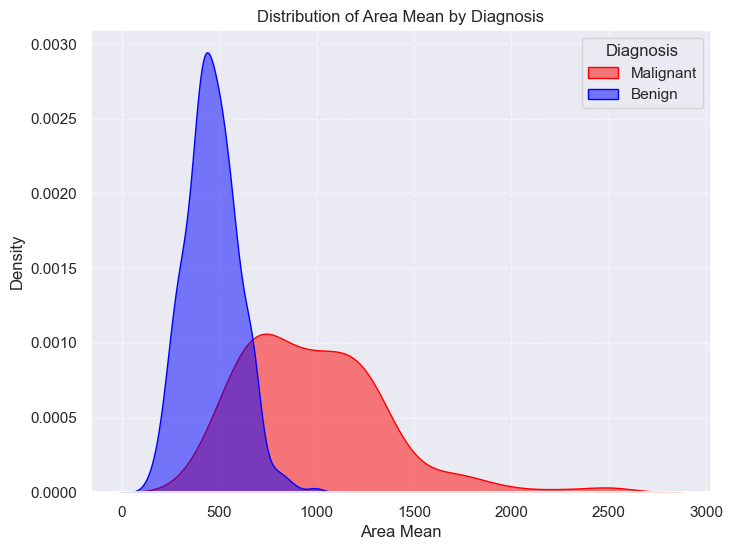

In [115]:
plt.figure(figsize=(8,6))

# KDE for malignant
sns.kdeplot(
    data=df2[df2['diagnosis']=='M'],
    x='area_mean',
    fill=True,             # fill under the curve
    color='red',
    alpha=0.5,
    label='Malignant'
)

# KDE for benign
sns.kdeplot(
    data=df2[df2['diagnosis']=='B'],
    x='area_mean',
    fill=True,
    color='blue',
    alpha=0.5,
    label='Benign'
)

# Labels and title
plt.xlabel('Area Mean')
plt.ylabel('Density')
plt.title('Distribution of Area Mean by Diagnosis')
plt.legend(title='Diagnosis')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()